In [1]:
# Importing basic labraries
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# sklearn modules
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [4]:
# Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
# Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [6]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 102C-9CE7

 Directory of C:\Users\Gaurab\Workspace\Capstone_Project\TODO\Gold Price

24-07-2021  08:15    <DIR>          .
24-07-2021  08:15    <DIR>          ..
24-07-2021  08:07    <DIR>          .ipynb_checkpoints
23-07-2021  20:02            42,904 archive.zip
20-10-2019  13:02           130,560 gld_price_data.csv
24-07-2021  08:15             1,980 Gold Price Prediction.ipynb
               3 File(s)        175,444 bytes
               3 Dir(s)  117,590,749,184 bytes free


In [7]:
df = pd.read_csv('gld_price_data.csv')
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [8]:
df.shape

(2290, 6)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [11]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [12]:
df[df.duplicated()]

,Date,SPX,GLD,USO,SLV,EUR/USD


In [13]:
df.corr()

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Figure size 576x576 with 0 Axes>

<AxesSubplot:>

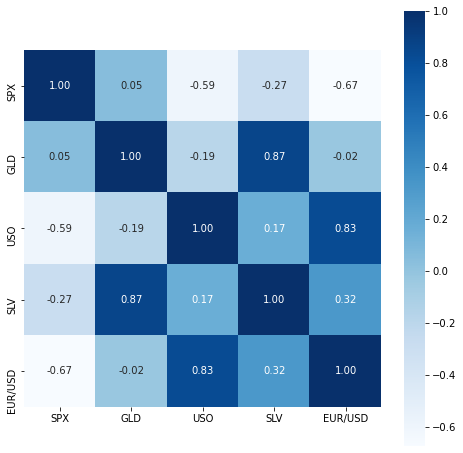

In [15]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, square=True, annot=True, fmt='0.2f', cbar=True, cmap='Blues')

In [16]:
df.corr()['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

<AxesSubplot:xlabel='GLD', ylabel='Density'>

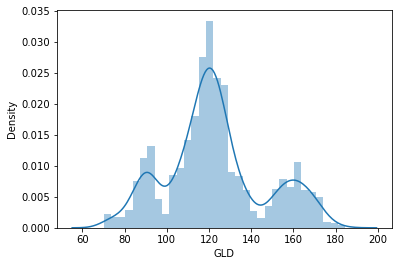

In [17]:
sns.distplot(df['GLD'])

In [27]:
gold = df[['Date', 'GLD']]

In [30]:
gold['Date'] = pd.to_datetime(gold['Date'])
gold = gold.set_index('Date')
gold.head()

,GLD
Date,
2008-01-02,84.860001
2008-01-03,85.570000
2008-01-04,85.129997
2008-01-07,84.769997
2008-01-08,86.779999


<Figure size 1152x576 with 0 Axes>

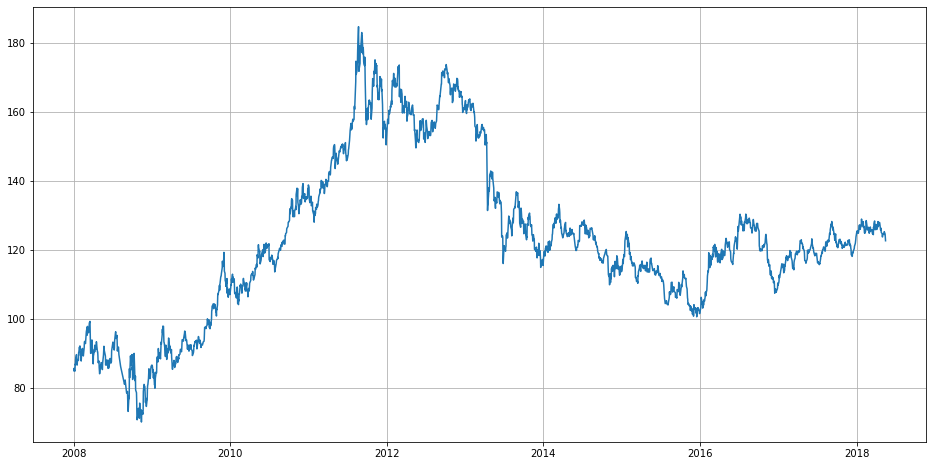

In [31]:
plt.figure(figsize=(16,8))
plt.plot(gold['GLD'])
# plt.xticks(gold['Date'])
plt.grid(True)
plt.show()

In [35]:
X = df.drop(columns=['Date', 'GLD'], axis=1)
Y = df[['GLD']]

In [48]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [49]:
# training the model
model = RandomForestRegressor(n_estimators=100)
model.fit(x_train, y_train)

RandomForestRegressor()

In [50]:
# prediction on test data
pred = model.predict(x_test)

In [51]:
# R squared error
error_score = metrics.r2_score(y_test, pred)
print("R squared error : ", error_score)

R squared error :  0.9891923591082314


In [61]:
print(pred)

[168.70579974  82.0238997  115.91900017 127.57300059 121.01680135
 154.60939789 150.11929847 126.26340058 117.55269877 126.08550071
 116.51410081 172.36950055 141.29349902 166.90699869 115.04979981
 117.36820071 139.1188028  170.21720083 159.83550328 160.27059944
 155.13200018 124.99140018 175.9598997  156.89260347 125.25860047
  93.60789969  77.90230018 120.74940007 119.18499928 167.51949983
  88.11090022 125.16330009  91.09770077 117.69510016 121.13739907
 137.32160118 115.60640092 114.88210014 148.08000003 106.85520112
 104.50840257  87.29309787 126.53280035 117.53830012 152.16689852
 119.52540027 108.44830021 107.98549847  93.21800101 127.27669767
  74.71110051 113.52749858 121.5504999  111.3065992  118.8815989
 120.79549944 158.95519955 167.56190155 146.93149671  85.84069888
  94.43350018  86.81839896  90.37500008 118.93720071 126.44300048
 127.57449994 169.79890019 122.31559929 117.20209916  98.74370054
 168.420201   142.60029824 131.99730233 121.20320215 120.89569924
 119.743800

In [72]:
comp = y_test.reset_index(drop=True)
comp['Predicted'] = pred
comp = comp.rename(columns={'GLD': 'Actual'})
comp['Diff'] = ((comp['Predicted']-comp['Actual'])/comp['Actual'])*100

In [73]:
comp

,Actual,Predicted,Diff
0,168.020004,168.705800,0.408163
1,81.230003,82.023900,0.977344
2,112.320000,115.919000,3.204238
3,127.589996,127.573001,-0.013320
4,119.620003,121.016801,1.167696
...,...,...,...
453,166.380005,167.219898,0.504804
454,106.379997,108.265699,1.772610
455,122.239998,121.865299,-0.306528
456,133.830002,139.759201,4.430396


<Figure size 720x432 with 0 Axes>

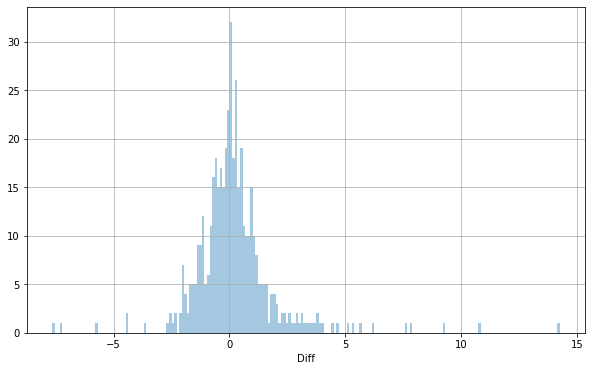

In [85]:
plt.figure(figsize=(10,6))
a_plot = sns.distplot(comp['Diff'], bins=200, kde=False)
# a_plot.set(xlim=(-5,5))
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Actual Price vs Predicted Price')

Text(0.5, 0, 'Number of values')

Text(0, 0.5, 'GLD Price')

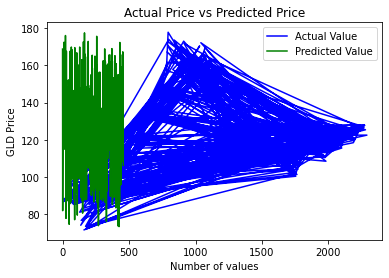

In [55]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(pred, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()